### Decorrelating your data and dimension reduction

In [71]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [72]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [73]:
iris = datasets.load_iris()

X = iris.data[:, [0,2,1,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(4.110143369175627, 8.089856630824372, 0.6898233995584988, 7.2101766004415015)

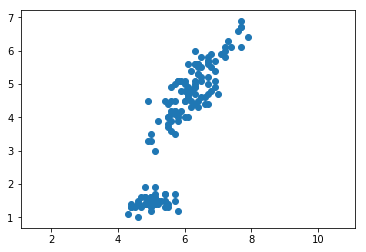

In [74]:
x1 = X[:,0]
x2 = X[:,1]

plt.scatter(x1, x2)
plt.axis('equal')

In [76]:
# Calculate the Pearson correlation
pearsonr(x1, x2) #Out: (correlation, pvalue)

(0.8717537758865832, 1.0386674194497583e-47)

In [77]:
model = PCA()

In [78]:
model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

- Principal components = direction of variance
- Resulting features are not correlated

In [79]:
transformed = model.transform(X)

In [80]:
model.components_

array([[ 0.36138659,  0.85667061, -0.08452251,  0.3582892 ],
       [ 0.65658877, -0.17337266,  0.73016143, -0.07548102],
       [-0.58202985,  0.07623608,  0.59791083,  0.54583143],
       [-0.31548719,  0.47983899,  0.3197231 , -0.75365743]])

(-3.5846328329869492,
 4.156474511194185,
 -1.4131546048338672,
 1.5213485011005217)

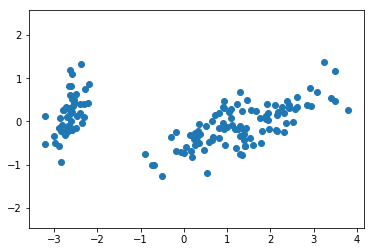

In [81]:
pca_features = model.fit_transform(X)

xs = pca_features[:,0]
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')

Decorrelated measurements

In [82]:
pearsonr(xs, ys)

(-4.2369937918774244e-16, 1.0)

### Intrinsic dimension

Intrinsic dimension = number of features needed to approximate  the dataset = number of PCA features with significant variance

- Essential idea behind dimension reduction
- Can be detected with PCA
- Low variance features are "noise", high variance features are informative

In [83]:
features = range(model.n_components_) # 4 components

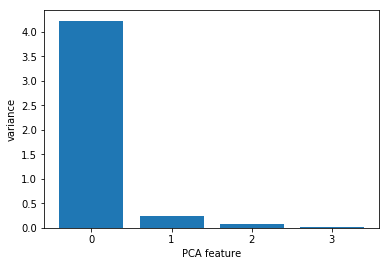

In [86]:
plt.bar(features, model.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features);

In [87]:
model.mean_

array([5.84333333, 3.758     , 3.05733333, 1.19933333])

In [88]:
model.components_

array([[ 0.36138659,  0.85667061, -0.08452251,  0.3582892 ],
       [ 0.65658877, -0.17337266,  0.73016143, -0.07548102],
       [-0.58202985,  0.07623608,  0.59791083,  0.54583143],
       [-0.31548719,  0.47983899,  0.3197231 , -0.75365743]])

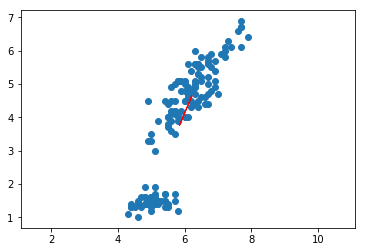

In [89]:
# Get the first principal component: first_pc
first_pc = model.components_[0,:]

plt.scatter(x1, x2)
plt.axis('equal')
plt.arrow(model.mean_[0], model.mean_[1], first_pc[0], first_pc[1], color='red', width=0.01)


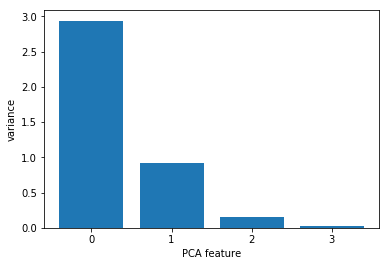

In [90]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(X)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Text(0.5, 0, 'Z-axis')

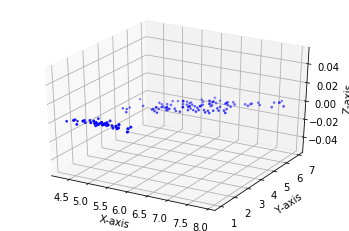

In [91]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[:,0], X[:,1], X[:,2], c = 'b', marker='o')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

In [92]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [93]:
transformed = pca.transform(X)
transformed.shape

(150, 2)

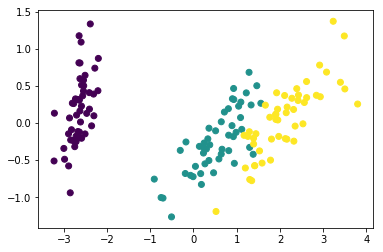

In [94]:
plt.scatter(transformed[:,0], transformed[:,1], c = y)

### NLP

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [106]:
csr = tfidf.fit_transform(['INSTRUCTIONS 100XP',
'Import TfidfVectorizer from sklearn.feature_extraction.text.',
'Create a TfidfVectorizer instance called tfidf.',
'Apply .fit_transform() method of tfidf to documents and assign the result to csr_mat. This is a word-frequency array in csr_matrix format.',
'Inspect csr_mat by calling its .toarray() method and printing the result. This has been done for you.',
'The columns of the array correspond to words. Get the list of words by calling the .get_feature_names() method of tfidf, and assign the result to words.'])

In [108]:
csr.toarray()

array([[0.70710678, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.70710678,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.4198708 , 0.        , 0.        , 0.        ,
        0.        , 0.4198708 , 0.        , 0.        , 0.        ,
   

In [109]:
words = tfidf.get_feature_names()
words

['100xp',
 'and',
 'apply',
 'array',
 'assign',
 'been',
 'by',
 'called',
 'calling',
 'columns',
 'correspond',
 'create',
 'csr_mat',
 'csr_matrix',
 'documents',
 'done',
 'feature_extraction',
 'fit_transform',
 'for',
 'format',
 'frequency',
 'from',
 'get',
 'get_feature_names',
 'has',
 'import',
 'in',
 'inspect',
 'instance',
 'instructions',
 'is',
 'its',
 'list',
 'method',
 'of',
 'printing',
 'result',
 'sklearn',
 'text',
 'tfidf',
 'tfidfvectorizer',
 'the',
 'this',
 'to',
 'toarray',
 'word',
 'words',
 'you']

In [124]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [130]:
svd = TruncatedSVD(n_components=10)
kmeans = KMeans(n_clusters=2)
pipeline = make_pipeline(svd, kmeans)

In [131]:
pipeline.fit(csr)

Pipeline(memory=None,
     steps=[('truncatedsvd', TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
       random_state=None, tol=0.0)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [132]:
labels = pipeline.predict(csr)

In [133]:
labels

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [134]:
import pandas as pd

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'words': words[:6]})

# Display df sorted by cluster label
print(df.sort_values('label'))

   label   words
3      0   array
4      0  assign
5      0    been
0      1   100xp
1      1     and
2      1   apply
